In [11]:
import pickle
%matplotlib inline

In [12]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['text.usetex'] = True

In [14]:
df = pd.read_csv('../data/laser/laser_angles.csv')

In [15]:
measurements = np.zeros([len(df), 3])

for i in range(len(df)):
    measurements[i] = df['angle1'][i], df['angle2'][i], df['angle3'][i]

df['avg_angle'] = np.average(measurements, axis=1)

error = np.zeros(len(df))

for i in range(len(df)):
    error[i] = np.max(np.abs(df['avg_angle'][i] - [df['angle1'][i], df['angle2'][i], df['angle3'][i]]))
df['error'] = error

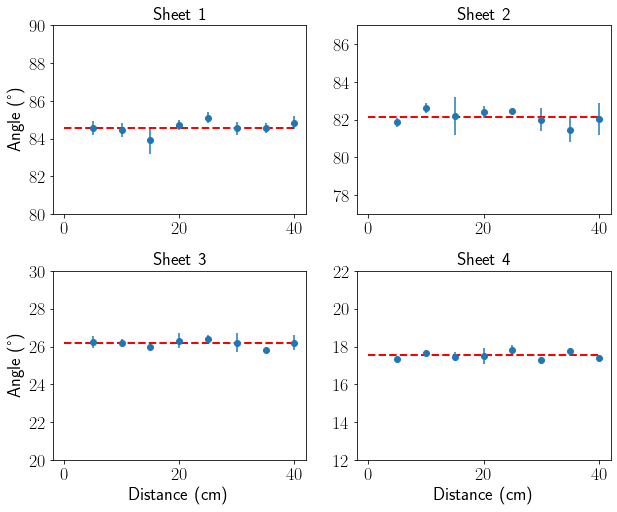

In [16]:
fig, axs = plt.subplots(2, 2)

sheets = np.arange(1, 5, 1)

ylims = [(80, 90), (77, 87), (20, 30), (12, 22)]

for i, sheet in enumerate(sheets):
    ax = axs[(sheet - 1) // 2, (sheet - 1) % 2]

    idx_sheet = df.index[df['sheet'] == sheet]
    ax.errorbar(df['distance'][idx_sheet], df['avg_angle'][idx_sheet], yerr=df['error'][idx_sheet], xerr=0.05, linestyle='None', marker='o')
    ax.hlines(y=np.average(df['avg_angle'][idx_sheet]), xmin=0, xmax=40, linewidth=2, color='r', linestyles='dashed')
    ax.set_title('Sheet {}'.format(sheet))

    if (sheet - 1) // 2 == 1:
        ax.set(xlabel='Distance (cm)')
    if (sheet - 1) % 2 == 0:
        ax.set(ylabel='Angle (°)')

    ax.set_ylim(ylims[i][0], ylims[i][1])

fig.set_size_inches(10, 8)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig('angle_vs_distance.png')

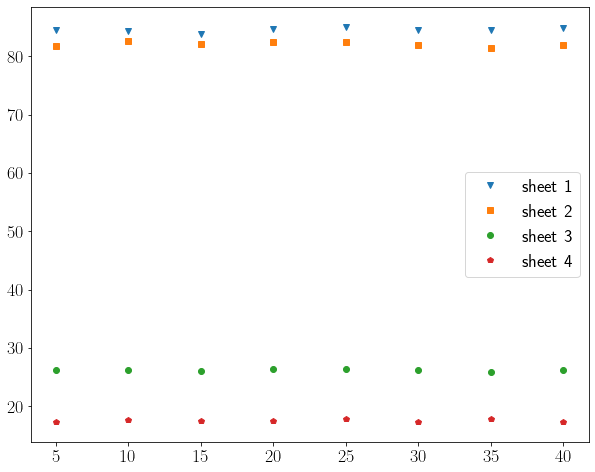

In [17]:
idx_sheet = df.index[df['sheet'] == 1]
plt.plot(df['distance'][idx_sheet], df['avg_angle'][idx_sheet], label='sheet 1', linestyle='None', marker='v')

idx_sheet = df.index[df['sheet'] == 2]
plt.plot(df['distance'][idx_sheet], df['avg_angle'][idx_sheet], label='sheet 2', linestyle='None', marker='s')

idx_sheet = df.index[df['sheet'] == 3]
plt.plot(df['distance'][idx_sheet], df['avg_angle'][idx_sheet], label='sheet 3', linestyle='None', marker='o')

idx_sheet = df.index[df['sheet'] == 4]
plt.plot(df['distance'][idx_sheet], df['avg_angle'][idx_sheet], label='sheet 4', linestyle='None', marker='p')

plt.legend()

In [18]:
df = pd.read_csv('../data/laser/angles_vs_theory.csv')

In [21]:
df['simulation']

0    89.5
1    79.0
2    23.6
3    16.7
Name: simulation, dtype: float64

/tmp/ipykernel_377642/721340327.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


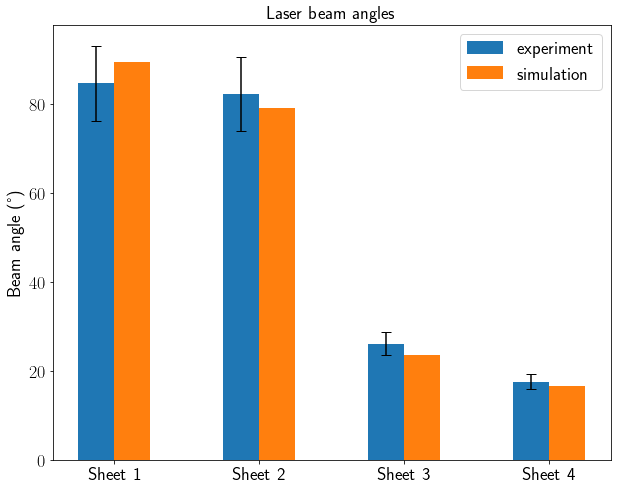

In [19]:
fig, ax = plt.subplots()

labels = ['Sheet 1', 'Sheet 2', 'Sheet 3', 'Sheet 4']

ax.bar(df['sheet'], df['experiment'], width=0.25, yerr=df['experiment']*10/100, capsize=5, label='experiment')
ax.bar(df['sheet'] + 0.25, df['simulation'], width=0.25, label='simulation')
ax.legend()
ax.set_ylabel('Beam angle (°)')
ax.set_xticks(df['sheet'] + 0.25/2)
ax.set_xticklabels(labels)
ax.set_title('Laser beam angles')

fig.savefig('angles_simulation_experiments.png')
fig.show()

In [3]:
LPcm_03 = pickle.load(open('beam_angles_0.3.pickle', 'rb'))

In [20]:
LPcm_01 = pickle.load(open('beam_angles_0.1.pickle', 'rb'))

In [38]:
LPcm_01[0] -= 0.15

In [39]:
LPcm_01

[24.26509898977716,
 24.315098989777162,
 24.379199324271696,
 24.47555155200083,
 24.743893666975648]

In [18]:
LPcm_03[3] -= 0.2

In [7]:
LPcm_03

[80.88714256965412,
 73.5774919684242,
 83.00767516605318,
 89.54544705574573,
 61.36465302483759]

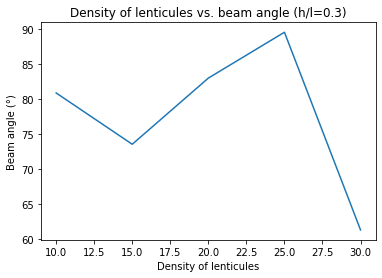

In [10]:
plt.plot(range(10, 31, 5), LPcm_03)

plt.xlabel('Density of lenticules')
plt.ylabel('Beam angle (°)')

plt.title('Density of lenticules vs. beam angle (h/l=0.3)')

plt.savefig('lenticules_beam_0.3.png')

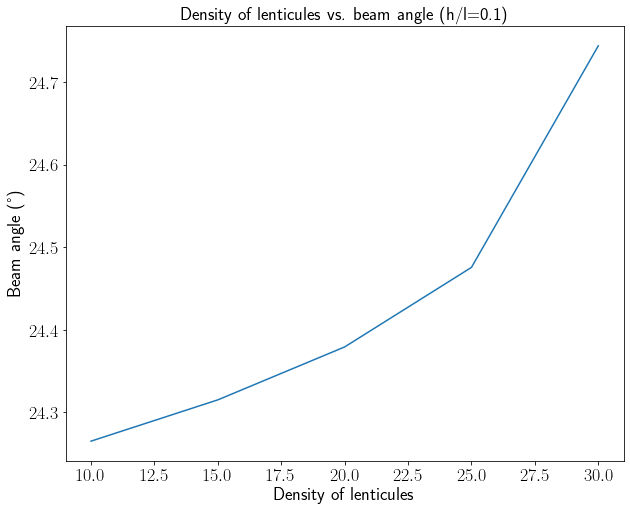

In [63]:
plt.plot(range(10, 31, 5), LPcm_01)

plt.xlabel('Density of lenticules')
plt.ylabel('Beam angle (°)')

plt.title('Density of lenticules vs. beam angle (h/l=0.1)')

plt.savefig('lenticules_beam_0.1.png')

In [9]:
h_15lpcm = pickle.load(open('beam_angles_15LPcm.pickle', 'rb'))

In [10]:
h_15lpcm

[24.539876981090913,
 43.035521418383844,
 68.21341691180032,
 68.36151317595322,
 73.5774919684242,
 64.69125935692045,
 78.98309422309394,
 72.15601432064574,
 66.7180495614611,
 65.95360475237375]

In [88]:
h_15lpcm[-2] += 1

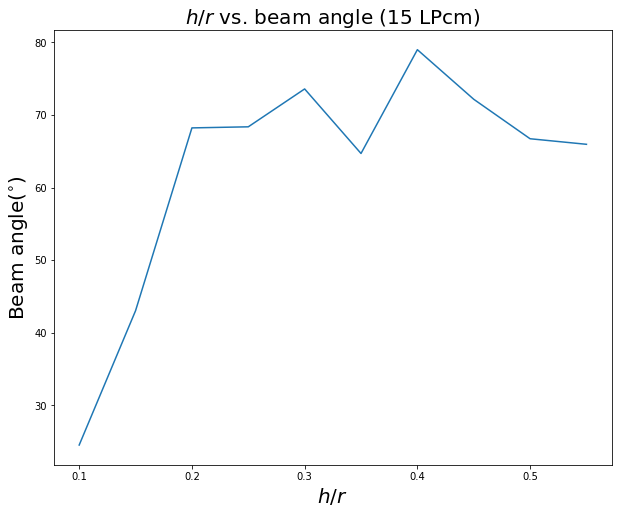

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(0.1, 0.6, 0.05), h_15lpcm)

ax.set_xlabel(r'$h/r$', fontsize=20)
ax.set_ylabel(r'Beam angle($^{\circ}$)', fontsize=20)
ax.set_title(r'$h/r$ vs. beam angle (15 LPcm)', fontsize=20)

fig.savefig('h_l_beam_angle_15lpcm.png')

In [18]:
h_10lpcm = pickle.load(open('beam_angles_10LPcm.pickle', 'rb'))

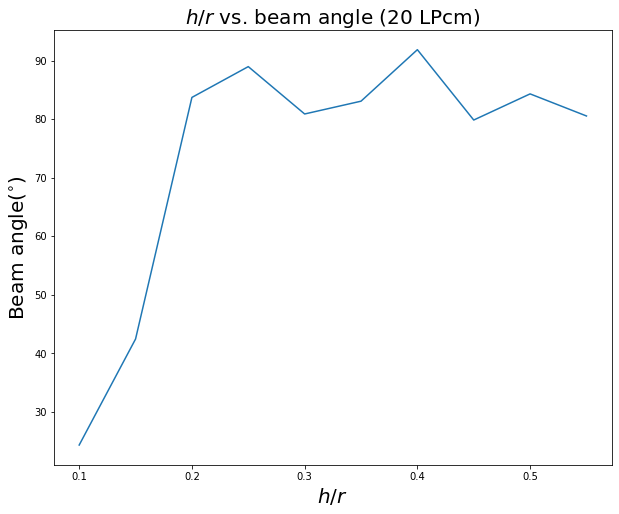

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(0.1, 0.6, 0.05), h_10lpcm)

ax.set_xlabel(r'$h/r$', fontsize=20)
ax.set_ylabel(r'Beam angle($^{\circ}$)', fontsize=20)
ax.set_title(r'$h/r$ vs. beam angle (20 LPcm)', fontsize=20)

fig.savefig('h_l_beam_angle_15lpcm.png')